In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

#file = '/project/airsea/PMOC_PacificMultidecadalVariabilityProject/PreInd_T31_gx3v7/PreInd_T31_gx3v7.pop.h.250?-??.nc'
file = '/scratch/jmarti91/cesmpreind_regularMLD.nc'
#Reading out the entire data set
ds=xr.open_dataset(file)


Notebook for reading out the AMOC for 100 years of a 3000 year CESM preindustrail control run. The run was used in Burls (2017) as a control simulation to examine the effects of pliocelene conditions on the overturning circulation. For this exercise, the Mixed-Layer Depth is plotted for the years 2654-2744 of the simulation. The file is located in scratch because the orignial data is on an irregular grid and thus needed to be changed to a regular grid. The data was masked in its original format, which is why the map already has the land removed.

In [14]:
#Getting the AMOC data from the data set
ds_mean = ds.mean(dim='time')
data = ds_mean['MLD']/100 #Converting the MLD to meters
#reading out the lon and the lat
x = ds['LON']
y = ds['LAT'] 


Text(0.5, 1.0, 'CESM Preindustrial Control Simulation 2645-2744')

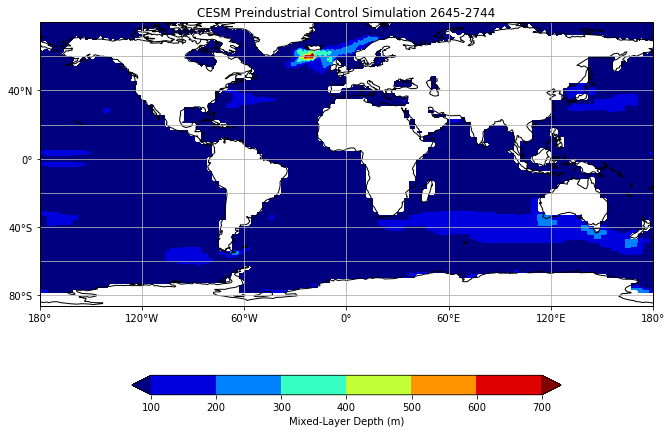

In [16]:
fig = plt.figure(figsize=(11,8.5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

cs = ax.contourf(x,y,data,cmap='jet',extend='both',transform=ccrs.PlateCarree())

data,x = add_cyclic_point(data,coord=np.linspace(np.min(x),np.max(x),data.shape[-1]))
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

#Now getting the y-ticks
ax.set_yticks(np.arange(-80,80,40),crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.7, label='Mixed-Layer Depth (m)')
plt.title('CESM Preindustrial Control Simulation 2645-2744')